MU (Micron) Trading Volume - Last 1 Month
Date
2025-12-17 00:00:00-05:00    41957100
2025-12-18 00:00:00-05:00    65006100
2025-12-19 00:00:00-05:00    62312100
2025-12-22 00:00:00-05:00    30961900
2025-12-23 00:00:00-05:00    20767600
2025-12-24 00:00:00-05:00    18592600
2025-12-26 00:00:00-05:00    17878500
2025-12-29 00:00:00-05:00    26642900
2025-12-30 00:00:00-05:00    23056400
2025-12-31 00:00:00-05:00    17573800
2026-01-02 00:00:00-05:00    42604300
2026-01-05 00:00:00-05:00    34608600
2026-01-06 00:00:00-05:00    48732400
2026-01-07 00:00:00-05:00    32781100
2026-01-08 00:00:00-05:00    33897700
2026-01-09 00:00:00-05:00    33387500
2026-01-12 00:00:00-05:00    23152600
2026-01-13 00:00:00-05:00    23881300
2026-01-14 00:00:00-05:00    20277200
2026-01-15 00:00:00-05:00    25370200
2026-01-16 00:00:00-05:00    47112950
Name: Volume, dtype: int64

Average Daily Volume: 32,883,564
Total Volume: 690,554,850


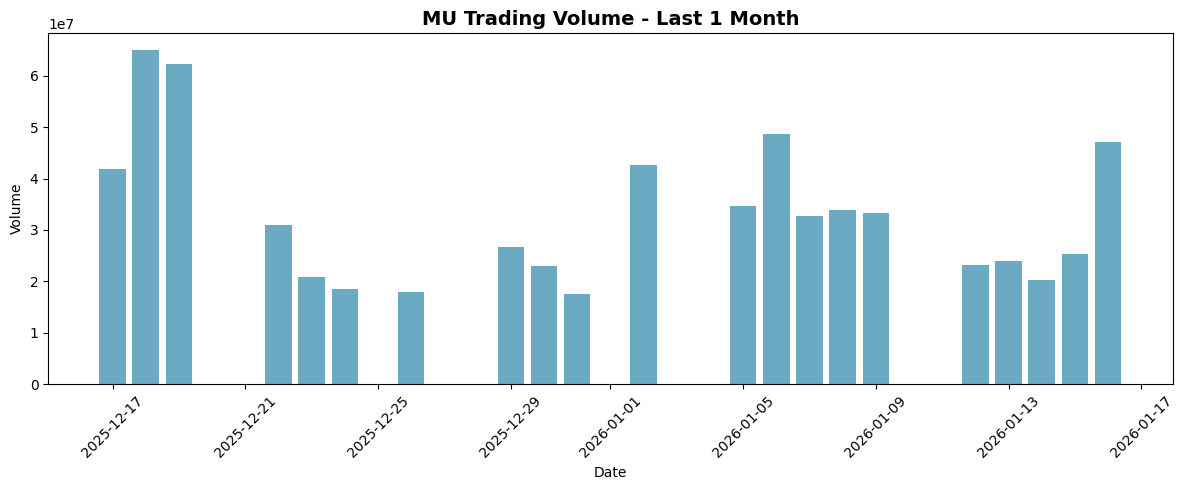

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch MU data for the last 1 month
mu = yf.Ticker("MU")
hist = mu.history(period="1mo")

# Print trading volume
print("MU (Micron) Trading Volume - Last 1 Month")
print("=" * 50)
print(hist['Volume'])
print(f"\nAverage Daily Volume: {hist['Volume'].mean():,.0f}")
print(f"Total Volume: {hist['Volume'].sum():,.0f}")

# Plot volume
plt.figure(figsize=(12, 5))
plt.bar(hist.index, hist['Volume'], color='#2E86AB', alpha=0.7)
plt.title('MU Trading Volume - Last 1 Month', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2]:
import yfinance as yf

mu = yf.Ticker("MU")
price = mu.info.get('currentPrice') or mu.info.get('regularMarketPrice')
print(f"Current MU (Micron) stock price: ${price:.2f}")

Current MU (Micron) stock price: $362.75


In [1]:
from datetime import datetime

print(f"Current date and time: {datetime.now().strftime('%A, %B %d, %Y at %H:%M:%S')}")

Current date and time: Friday, January 16, 2026 at 17:02:45


# Options Pricing Dashboard

This notebook provides a comprehensive dashboard for options pricing analysis with error handling.

**Features:**
- Comprehensive error handling for all imports
- Safe wrapper functions for calculations
- Historical volatility analysis
- Option pricing and payoff diagrams
- Monte Carlo simulation
- Risk metrics (Sharpe ratio, max drawdown)

## Setup and Imports with Error Handling

In [1]:
import sys
import logging

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Error handling for imports from utils.py
try:
    from utils import (
        validate_positive,
        validate_probability,
        calculate_log_returns,
        calculate_simple_returns,
        annualize_volatility,
        calculate_historical_volatility,
        time_to_maturity,
        format_percentage,
        calculate_option_payoff,
        calculate_profit_loss,
        calculate_breakeven,
        interpolate_volatility,
        generate_price_paths,
        calculate_sharpe_ratio,
        calculate_max_drawdown
    )
    logger.info("✓ Successfully imported all functions from utils.py")
    UTILS_AVAILABLE = True
    print("✓ Utils module loaded successfully")
except ModuleNotFoundError as e:
    logger.error(f"✗ utils.py module not found: {e}")
    logger.error("  Please ensure utils.py is in the same directory")
    UTILS_AVAILABLE = False
    print("\n⚠️  WARNING: Could not import utils.py module!")
    print("    Please ensure utils.py exists in the same directory.\n")
except ImportError as e:
    logger.error(f"✗ Error importing specific functions from utils.py: {e}")
    logger.error("  Some functions may not be available in utils.py")
    UTILS_AVAILABLE = False
    print(f"\n⚠️  WARNING: Error importing functions from utils.py!\n    {e}\n")
except Exception as e:
    logger.error(f"✗ Unexpected error while importing from utils.py: {e}")
    UTILS_AVAILABLE = False
    print(f"\n⚠️  WARNING: Unexpected error during import: {e}\n")

# Try importing numpy with error handling
try:
    import numpy as np
    NUMPY_AVAILABLE = True
    logger.info("✓ NumPy imported successfully")
    print("✓ NumPy loaded successfully")
except ImportError as e:
    logger.error(f"✗ NumPy is not available: {e}")
    NUMPY_AVAILABLE = False
    np = None
    print("\n⚠️  WARNING: NumPy not available!")
    print("    Install numpy using: pip install numpy\n")

# Try importing matplotlib with error handling
try:
    import matplotlib.pyplot as plt
    MATPLOTLIB_AVAILABLE = True
    logger.info("✓ Matplotlib imported successfully")
    print("✓ Matplotlib loaded successfully")
except ImportError as e:
    logger.error(f"✗ Matplotlib is not available: {e}")
    MATPLOTLIB_AVAILABLE = False
    plt = None
    print("\n⚠️  WARNING: Matplotlib not available!")
    print("    Install matplotlib using: pip install matplotlib\n")

# Configure plot style if matplotlib is available
if MATPLOTLIB_AVAILABLE:
    try:
        plt.style.use('seaborn-v0_8-darkgrid')
        logger.info("✓ Plot style configured successfully")
    except Exception as e:
        logger.warning(f"⚠ Could not set plot style: {e}")
        try:
            plt.style.use('default')
        except:
            pass

# Summary of import status
print("\n" + "="*60)
print("IMPORT STATUS SUMMARY")
print("="*60)
print(f"Utils:        {'✓ Available' if UTILS_AVAILABLE else '✗ NOT AVAILABLE'}")
print(f"NumPy:        {'✓ Available' if NUMPY_AVAILABLE else '✗ NOT AVAILABLE'}")
print(f"Matplotlib:   {'✓ Available' if MATPLOTLIB_AVAILABLE else '✗ NOT AVAILABLE'}")
print("="*60)

if UTILS_AVAILABLE and NUMPY_AVAILABLE:
    print("\n✓ All critical imports successful! Dashboard is ready to use.\n")
else:
    print("\n⚠️  WARNING: Some dependencies are missing!")
    print("   The dashboard may not function properly.\n")

2026-01-16 16:31:20,425 - __main__ - INFO - ✓ Successfully imported all functions from utils.py
2026-01-16 16:31:20,426 - __main__ - INFO - ✓ NumPy imported successfully


✓ Utils module loaded successfully
✓ NumPy loaded successfully


2026-01-16 16:31:20,703 - __main__ - INFO - ✓ Matplotlib imported successfully
2026-01-16 16:31:20,703 - __main__ - INFO - ✓ Plot style configured successfully


✓ Matplotlib loaded successfully

IMPORT STATUS SUMMARY
Utils:        ✓ Available
NumPy:        ✓ Available
Matplotlib:   ✓ Available

✓ All critical imports successful! Dashboard is ready to use.



## Safe Wrapper Functions

These functions provide error handling for common operations throughout the notebook.

In [2]:
def check_dependencies():
    """
    Check if all required dependencies are available.
    
    Returns:
        True if all dependencies are available, False otherwise
    """
    if not UTILS_AVAILABLE:
        logger.error("Utils module is not available. Dashboard functionality is limited.")
        print("⚠️  Utils module is not available")
        return False
    
    if not NUMPY_AVAILABLE:
        logger.error("NumPy is not available. Dashboard functionality is limited.")
        print("⚠️  NumPy is not available")
        return False
    
    logger.info("All dependencies are available")
    return True


def safe_calculate_volatility(prices, **kwargs):
    """
    Safely calculate historical volatility with error handling.
    
    Args:
        prices: Array of prices
        **kwargs: Additional arguments for calculate_historical_volatility
    
    Returns:
        Volatility value or None if calculation fails
    """
    if not UTILS_AVAILABLE:
        print("⚠️  Cannot calculate volatility: utils module not available")
        return None
    
    if not NUMPY_AVAILABLE:
        print("⚠️  Cannot calculate volatility: NumPy not available")
        return None
    
    try:
        volatility = calculate_historical_volatility(prices, **kwargs)
        logger.info(f"Successfully calculated volatility: {volatility}")
        return volatility
    except ValueError as e:
        print(f"⚠️  ValueError in volatility calculation: {e}")
        return None
    except Exception as e:
        print(f"⚠️  Unexpected error in volatility calculation: {e}")
        return None


def safe_calculate_option_value(spot_prices, strike, option_type="call"):
    """
    Safely calculate option payoff with error handling.
    
    Args:
        spot_prices: Array of spot prices
        strike: Strike price
        option_type: "call" or "put"
    
    Returns:
        Option payoff array or None if calculation fails
    """
    if not UTILS_AVAILABLE:
        print("⚠️  Cannot calculate option payoff: utils module not available")
        return None
    
    try:
        payoff = calculate_option_payoff(spot_prices, strike, option_type)
        logger.info(f"Successfully calculated {option_type} option payoff")
        return payoff
    except ValueError as e:
        print(f"⚠️  ValueError in option payoff calculation: {e}")
        return None
    except Exception as e:
        print(f"⚠️  Unexpected error in option payoff calculation: {e}")
        return None


def safe_generate_price_paths(S0, mu, sigma, T, steps, paths, seed=None):
    """
    Safely generate price paths with error handling.
    
    Args:
        S0: Initial stock price
        mu: Drift
        sigma: Volatility
        T: Time horizon
        steps: Number of steps
        paths: Number of paths
        seed: Random seed
    
    Returns:
        Price paths array or None if generation fails
    """
    if not UTILS_AVAILABLE:
        print("⚠️  Cannot generate price paths: utils module not available")
        return None
    
    try:
        price_paths = generate_price_paths(S0, mu, sigma, T, steps, paths, seed)
        logger.info(f"Successfully generated {paths} price paths with {steps} steps")
        return price_paths
    except ValueError as e:
        print(f"⚠️  ValueError in price path generation: {e}")
        return None
    except Exception as e:
        print(f"⚠️  Unexpected error in price path generation: {e}")
        return None


def safe_calculate_metrics(prices, risk_free_rate=0.0):
    """
    Safely calculate various risk metrics with error handling.
    
    Args:
        prices: Array of prices
        risk_free_rate: Risk-free rate for Sharpe ratio
    
    Returns:
        Dictionary of metrics or None if calculation fails
    """
    if not UTILS_AVAILABLE or not NUMPY_AVAILABLE:
        print("⚠️  Cannot calculate metrics: required modules not available")
        return None
    
    metrics = {}
    
    try:
        # Calculate returns
        log_returns = calculate_log_returns(prices)
        simple_returns = calculate_simple_returns(prices)
        
        # Calculate Sharpe ratio
        sharpe = calculate_sharpe_ratio(log_returns, risk_free_rate)
        
        # Calculate max drawdown
        max_dd, peak_idx, trough_idx = calculate_max_drawdown(prices)
        
        metrics = {
            'log_returns_mean': np.mean(log_returns),
            'log_returns_std': np.std(log_returns),
            'simple_returns_mean': np.mean(simple_returns),
            'sharpe_ratio': sharpe,
            'max_drawdown': max_dd,
            'max_drawdown_peak_idx': peak_idx,
            'max_drawdown_trough_idx': trough_idx
        }
        
        logger.info("Successfully calculated all risk metrics")
        return metrics
    
    except ValueError as e:
        print(f"⚠️  ValueError in metrics calculation: {e}")
        return None
    except Exception as e:
        print(f"⚠️  Unexpected error in metrics calculation: {e}")
        return None


# Check dependencies
if check_dependencies():
    print("\n✓ All dependencies available - ready to proceed!\n")
else:
    print("\n⚠️  Please install missing dependencies before proceeding.\n")

2026-01-16 16:31:31,093 - __main__ - INFO - All dependencies are available



✓ All dependencies available - ready to proceed!



## 1. Historical Volatility Analysis

Calculate and analyze historical volatility from sample price data.

In [3]:
if check_dependencies():
    # Generate sample price data
    np.random.seed(42)
    days = 252  # One year of trading days
    initial_price = 100
    returns = np.random.normal(0.0005, 0.02, days)
    prices = initial_price * np.exp(np.cumsum(returns))
    
    # Calculate historical volatility
    hist_vol = safe_calculate_volatility(prices, annualize=True)
    
    if hist_vol is not None:
        print(f"Historical Volatility: {format_percentage(hist_vol)}")
        print(f"Annualized Volatility: {hist_vol:.4f}")
        print(f"\nPrice Range: ${prices.min():.2f} - ${prices.max():.2f}")
        print(f"Final Price: ${prices[-1]:.2f}")
else:
    print("⚠️  Skipping: Dependencies not available")

2026-01-16 16:31:34,109 - __main__ - INFO - All dependencies are available
2026-01-16 16:31:34,137 - __main__ - INFO - Successfully calculated volatility: 0.3075300808910786


Historical Volatility: 30.75%
Annualized Volatility: 0.3075

Price Range: $80.41 - $117.74
Final Price: $111.30


In [ ]:
if check_dependencies() and MATPLOTLIB_AVAILABLE:
    # Plot price series and returns distribution
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
    
    # Price chart
    ax1.plot(prices, linewidth=2, color='#2E86AB')
    ax1.set_title('Stock Price History', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Trading Days')
    ax1.set_ylabel('Price ($)')
    ax1.grid(True, alpha=0.3)
    
    # Returns distribution
    log_returns = calculate_log_returns(prices)
    ax2.hist(log_returns, bins=50, alpha=0.7, color='#A23B72', edgecolor='black')
    ax2.set_title('Distribution of Log Returns', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Log Returns')
    ax2.set_ylabel('Frequency')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
elif not MATPLOTLIB_AVAILABLE:
    print("⚠️  Matplotlib not available - skipping visualization")

## 2. Rolling Volatility Analysis

In [ ]:
if check_dependencies():
    # Calculate rolling volatility with different windows
    windows = [20, 50, 100]
    rolling_vols = {}
    
    for window in windows:
        vol = safe_calculate_volatility(prices, window=window, annualize=True)
        if vol is not None:
            rolling_vols[window] = vol
            print(f"{window}-day rolling volatility calculated successfully")
    
    print(f"\nCalculated rolling volatilities for {len(rolling_vols)} windows")
else:
    print("⚠️  Skipping: Dependencies not available")

In [ ]:
if check_dependencies() and MATPLOTLIB_AVAILABLE and rolling_vols:
    # Plot rolling volatilities
    plt.figure(figsize=(14, 6))
    for window, vol in rolling_vols.items():
        plt.plot(range(window, len(prices)), vol, label=f'{window}-day window', linewidth=2)
    
    plt.title('Rolling Historical Volatility', fontsize=14, fontweight='bold')
    plt.xlabel('Trading Days')
    plt.ylabel('Annualized Volatility')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
elif not MATPLOTLIB_AVAILABLE:
    print("⚠️  Matplotlib not available - skipping visualization")

## 3. Option Payoff Analysis

In [ ]:
if check_dependencies():
    # Option parameters
    current_price = prices[-1]
    strike_price = 100
    call_premium = 5.0
    put_premium = 4.5
    
    # Generate range of spot prices at expiration
    spot_range = np.linspace(80, 120, 200)
    
    # Calculate payoffs
    call_payoff = safe_calculate_option_value(spot_range, strike_price, "call")
    put_payoff = safe_calculate_option_value(spot_range, strike_price, "put")
    
    if call_payoff is not None and put_payoff is not None:
        # Calculate P&L (long positions)
        call_pnl = calculate_profit_loss(call_payoff, call_premium, "long")
        put_pnl = calculate_profit_loss(put_payoff, put_premium, "long")
        
        # Calculate breakeven points
        call_breakeven = calculate_breakeven(strike_price, call_premium, "call")
        put_breakeven = calculate_breakeven(strike_price, put_premium, "put")
        
        print(f"Current Price: ${current_price:.2f}")
        print(f"Strike Price: ${strike_price:.2f}")
        print(f"\nCall Option:")
        print(f"  Premium: ${call_premium:.2f}")
        print(f"  Breakeven: ${call_breakeven:.2f}")
        print(f"\nPut Option:")
        print(f"  Premium: ${put_premium:.2f}")
        print(f"  Breakeven: ${put_breakeven:.2f}")
else:
    print("⚠️  Skipping: Dependencies not available")

In [ ]:
if check_dependencies() and MATPLOTLIB_AVAILABLE and call_payoff is not None:
    # Plot payoff diagrams
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Call option
    ax1.plot(spot_range, call_payoff, label='Payoff', linewidth=2, color='#2E86AB')
    ax1.plot(spot_range, call_pnl, label='P&L (Long)', linewidth=2, color='#A23B72')
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.3)
    ax1.axvline(x=strike_price, color='gray', linestyle='--', alpha=0.5, label=f'Strike ${strike_price}')
    ax1.axvline(x=call_breakeven, color='green', linestyle='--', alpha=0.5, label=f'Breakeven ${call_breakeven:.2f}')
    ax1.set_title('Call Option Payoff Diagram', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Spot Price at Expiration ($)')
    ax1.set_ylabel('Profit/Loss ($)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Put option
    ax2.plot(spot_range, put_payoff, label='Payoff', linewidth=2, color='#2E86AB')
    ax2.plot(spot_range, put_pnl, label='P&L (Long)', linewidth=2, color='#A23B72')
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.3)
    ax2.axvline(x=strike_price, color='gray', linestyle='--', alpha=0.5, label=f'Strike ${strike_price}')
    ax2.axvline(x=put_breakeven, color='green', linestyle='--', alpha=0.5, label=f'Breakeven ${put_breakeven:.2f}')
    ax2.set_title('Put Option Payoff Diagram', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Spot Price at Expiration ($)')
    ax2.set_ylabel('Profit/Loss ($)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
elif not MATPLOTLIB_AVAILABLE:
    print("⚠️  Matplotlib not available - skipping visualization")

## 4. Monte Carlo Simulation

In [ ]:
if check_dependencies():
    # Simulation parameters
    S0 = current_price
    mu = 0.10  # 10% annual drift
    sigma = hist_vol  # Use calculated historical volatility
    T = 1.0  # 1 year
    steps = 252  # Daily steps
    num_paths = 1000
    
    # Generate price paths
    price_paths = safe_generate_price_paths(S0, mu, sigma, T, steps, num_paths, seed=42)
    
    if price_paths is not None:
        print(f"Simulation Parameters:")
        print(f"  Initial Price: ${S0:.2f}")
        print(f"  Drift (μ): {format_percentage(mu)}")
        print(f"  Volatility (σ): {format_percentage(sigma)}")
        print(f"  Time Horizon: {T} year(s)")
        print(f"  Number of Paths: {num_paths:,}")
        print(f"\nFinal Price Statistics:")
        print(f"  Mean: ${np.mean(price_paths[:, -1]):.2f}")
        print(f"  Median: ${np.median(price_paths[:, -1]):.2f}")
        print(f"  Std Dev: ${np.std(price_paths[:, -1]):.2f}")
        print(f"  Min: ${np.min(price_paths[:, -1]):.2f}")
        print(f"  Max: ${np.max(price_paths[:, -1]):.2f}")
else:
    print("⚠️  Skipping: Dependencies not available")

In [ ]:
if check_dependencies() and MATPLOTLIB_AVAILABLE and price_paths is not None:
    # Plot simulated paths
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Sample paths
    sample_paths = min(100, num_paths)
    for i in range(sample_paths):
        ax1.plot(price_paths[i], alpha=0.3, linewidth=0.5)
    ax1.plot(np.mean(price_paths, axis=0), color='red', linewidth=3, label='Mean Path')
    ax1.set_title(f'Monte Carlo Simulation ({sample_paths} Sample Paths)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Time Steps')
    ax1.set_ylabel('Price ($)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Distribution of final prices
    ax2.hist(price_paths[:, -1], bins=50, alpha=0.7, color='#A23B72', edgecolor='black')
    ax2.axvline(np.mean(price_paths[:, -1]), color='red', linestyle='--', linewidth=2, label='Mean')
    ax2.axvline(np.median(price_paths[:, -1]), color='green', linestyle='--', linewidth=2, label='Median')
    ax2.set_title('Distribution of Final Prices', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Final Price ($)')
    ax2.set_ylabel('Frequency')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
elif not MATPLOTLIB_AVAILABLE:
    print("⚠️  Matplotlib not available - skipping visualization")

## 5. Option Pricing with Monte Carlo

In [ ]:
if check_dependencies() and price_paths is not None:
    # Calculate option prices using Monte Carlo
    call_payoffs_mc = calculate_option_payoff(price_paths[:, -1], strike_price, "call")
    put_payoffs_mc = calculate_option_payoff(price_paths[:, -1], strike_price, "put")
    
    # Discount to present value (assuming risk-free rate = 0 for simplicity)
    call_price_mc = np.mean(call_payoffs_mc)
    put_price_mc = np.mean(put_payoffs_mc)
    
    # Calculate confidence intervals
    call_ci = 1.96 * np.std(call_payoffs_mc) / np.sqrt(num_paths)
    put_ci = 1.96 * np.std(put_payoffs_mc) / np.sqrt(num_paths)
    
    print("Monte Carlo Option Pricing Results:")
    print(f"\nCall Option (Strike: ${strike_price}):")
    print(f"  Estimated Price: ${call_price_mc:.2f}")
    print(f"  95% CI: ±${call_ci:.2f}")
    print(f"  In-the-money: {np.sum(call_payoffs_mc > 0) / num_paths * 100:.1f}%")
    
    print(f"\nPut Option (Strike: ${strike_price}):")
    print(f"  Estimated Price: ${put_price_mc:.2f}")
    print(f"  95% CI: ±${put_ci:.2f}")
    print(f"  In-the-money: {np.sum(put_payoffs_mc > 0) / num_paths * 100:.1f}%")
else:
    print("⚠️  Skipping: Dependencies not available or price paths not generated")

## 6. Risk Metrics Analysis

In [ ]:
if check_dependencies():
    # Calculate risk metrics for the original price series
    metrics = safe_calculate_metrics(prices, risk_free_rate=0.02)
    
    if metrics is not None:
        print("Risk Metrics:")
        print(f"\nSharpe Ratio: {metrics['sharpe_ratio']:.4f}")
        print(f"\nMaximum Drawdown: {format_percentage(metrics['max_drawdown'])}")
        print(f"  Peak Index: {metrics['max_drawdown_peak_idx']}")
        print(f"  Trough Index: {metrics['max_drawdown_trough_idx']}")
        print(f"  Peak Price: ${prices[metrics['max_drawdown_peak_idx']]:.2f}")
        print(f"  Trough Price: ${prices[metrics['max_drawdown_trough_idx']]:.2f}")
        print(f"\nReturns Statistics:")
        print(f"  Mean Log Returns: {metrics['log_returns_mean']:.6f}")
        print(f"  Std Log Returns: {metrics['log_returns_std']:.6f}")
        print(f"  Mean Simple Returns: {metrics['simple_returns_mean']:.6f}")
else:
    print("⚠️  Skipping: Dependencies not available")

In [ ]:
if check_dependencies() and MATPLOTLIB_AVAILABLE and metrics is not None:
    # Plot drawdown analysis
    peak_idx = metrics['max_drawdown_peak_idx']
    trough_idx = metrics['max_drawdown_trough_idx']
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))
    
    # Price with drawdown period highlighted
    ax1.plot(prices, linewidth=2, color='#2E86AB', label='Price')
    ax1.axvline(x=peak_idx, color='green', linestyle='--', alpha=0.7, label=f'Peak (${prices[peak_idx]:.2f})')
    ax1.axvline(x=trough_idx, color='red', linestyle='--', alpha=0.7, label=f'Trough (${prices[trough_idx]:.2f})')
    ax1.fill_between(range(peak_idx, trough_idx+1),
                      prices[peak_idx:trough_idx+1],
                      prices[peak_idx],
                      alpha=0.3, color='red', label='Drawdown Period')
    ax1.set_title('Price Series with Maximum Drawdown', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Trading Days')
    ax1.set_ylabel('Price ($)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Drawdown series
    cumulative_max = np.maximum.accumulate(prices)
    drawdowns = (prices - cumulative_max) / cumulative_max
    ax2.fill_between(range(len(drawdowns)), drawdowns, 0, alpha=0.5, color='red')
    ax2.plot(drawdowns, linewidth=1, color='darkred')
    ax2.set_title('Drawdown Over Time', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Trading Days')
    ax2.set_ylabel('Drawdown (%)')
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
elif not MATPLOTLIB_AVAILABLE:
    print("⚠️  Matplotlib not available - skipping visualization")

## 7. Summary Dashboard

In [ ]:
if check_dependencies() and metrics is not None:
    print("\n" + "="*70)
    print("OPTIONS PRICING DASHBOARD SUMMARY")
    print("="*70)
    print(f"\nMarket Data:")
    print(f"  Current Price:           ${current_price:.2f}")
    print(f"  Historical Volatility:   {format_percentage(hist_vol)}")
    
    print(f"\nRisk Metrics:")
    print(f"  Sharpe Ratio:            {metrics['sharpe_ratio']:.4f}")
    print(f"  Maximum Drawdown:        {format_percentage(metrics['max_drawdown'])}")
    
    print(f"\nOption Pricing (Strike: ${strike_price}):")
    print(f"  Call Price (MC):         ${call_price_mc:.2f}")
    print(f"  Put Price (MC):          ${put_price_mc:.2f}")
    print(f"  Call Breakeven:          ${call_breakeven:.2f}")
    print(f"  Put Breakeven:           ${put_breakeven:.2f}")
    
    print(f"\nSimulation Results:")
    print(f"  Paths Simulated:         {num_paths:,}")
    print(f"  Mean Final Price:        ${np.mean(price_paths[:, -1]):.2f}")
    print(f"  Median Final Price:      ${np.median(price_paths[:, -1]):.2f}")
    print("="*70 + "\n")
else:
    print("⚠️  Cannot generate summary: Some calculations failed or dependencies missing")

## 8. Custom Analysis

Use the cells below for your own custom analysis using the imported utility functions.

In [ ]:
# Your custom analysis here
